In [1]:
# Notebook from https://www.jiristodulka.com/post/recsys_cf/
# import sys
# !{sys.executable} -m pip install scikit-surprise
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from collections import defaultdict #data colector

#Surprise: https://surprise.readthedocs.io/en/stable/
import surprise

from surprise.reader import Reader
from surprise import Dataset
from surprise.model_selection import GridSearchCV

  ##CrossValidation
from surprise.model_selection import cross_validate


  ##Matrix Factorization Algorithms
from surprise import *

np.random.seed(42) # replicating results

In [36]:
df = pd.read_csv("./drinqsapp-database-dump/surprise.csv", sep=',', index_col=0)

In [37]:
df.describe()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039 entries, 226 to 1731
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   1039 non-null   float64
 1   ctail_id  1039 non-null   float64
 2   rating    1039 non-null   float64
dtypes: float64(3)
memory usage: 32.5 KB


,user_id,ctail_id,rating
226,5.0,767.0,1.0
227,5.0,1068.0,1.0
228,5.0,1367.0,1.0
229,5.0,277.0,1.0
230,5.0,358.0,-1.0


In [4]:
reader = Reader(rating_scale=(-1, 1)) #line_format by default order of the fields
data = Dataset.load_from_df(df[["user_id", "ctail_id", "rating"]], reader=reader)

trainset = data.build_full_trainset()
test_model = trainset.build_testset()
testset = trainset.build_anti_testset()


In [93]:
def rmse_vs_factors(algorithm, data):
  """Returns: rmse_algorithm i.e. a list of mean RMSE of CV = 5 in cross_validate() for each  factor k in range(1, 101, 1)
  100 values 
  Arg:  i.) algorithm = Matrix factoization algorithm, e.g SVD/NMF/PMF, ii.)  data = surprise.dataset.DatasetAutoFolds
  """
  
  rmse_algorithm = []
  
  for k in range(1, 101, 1):
    algo = algorithm(n_factors = k)
    
    #["test_rmse"] is a numpy array with min accuracy value for each testset
    loss_fce = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)["test_rmse"].mean() 
    rmse_algorithm.append(loss_fce)
  
  return rmse_algorithm

In [133]:
rmse_svd = rmse_vs_factors(SVD,data)

In [134]:
rmse_svd

[0.8483998351299492,
 0.8413259174107266,
 0.8430058713899637,
 0.8452633457608123,
 0.8415029408373108,
 0.8442990064066764,
 0.8422907011736356,
 0.8397005401251298,
 0.8388710266316535,
 0.84457696346803,
 0.84266185119175,
 0.8481193459507557,
 0.8488762516141911,
 0.8461381937866654,
 0.8474016532962019,
 0.8469810401599316,
 0.8452480295359166,
 0.8443848491419589,
 0.8393811772916896,
 0.850198288802906,
 0.8428558427975279,
 0.8480593844722965,
 0.8441417485053236,
 0.8410035364343497,
 0.8434627255658832,
 0.8363223115426326,
 0.8453608663038181,
 0.8510115617077035,
 0.8482707725168991,
 0.8423048256762252,
 0.8508037903913325,
 0.838206302826288,
 0.8408335500172782,
 0.8452679640407637,
 0.8474099993010549,
 0.8404560129417273,
 0.8530984545231723,
 0.8451074454968174,
 0.843551786760182,
 0.8456579363144849,
 0.8461659187799808,
 0.8448309196452053,
 0.8425205492484947,
 0.840911162269891,
 0.8461444518665072,
 0.8492581055455979,
 0.8439245229399219,
 0.8458922916934588,


In [135]:
def plot_rmse(rmse, algorithm):
  """Returns: sub plots (2x1) of rmse against number of factors. 
     Vertical line in the second subplot identifies the arg for minimum RMSE
    
     Arg: i.) rmse = list of mean RMSE returned by rmse_vs_factors(), ii.) algorithm = STRING! of algo 
  """
  
  plt.figure(num=None, figsize=(11, 5), dpi=80, facecolor='w', edgecolor='k')

  plt.subplot(2,1,1)
  plt.plot(rmse)
  plt.xlim(0,100)
  plt.title("{0} Performance: RMSE Against Number of Factors".format(algorithm), size = 20 )
  plt.ylabel("Mean RMSE (cv=5)")

  plt.subplot(2,1,2)
  plt.plot(rmse)
  plt.xlim(0,50)
  plt.xticks(np.arange(0, 52, step=2))

  plt.xlabel("{0}(n_factor = k)".format(algorithm))
  plt.ylabel("Mean RMSE (cv=5)")
  plt.axvline(np.argmin(rmse), color = "r")

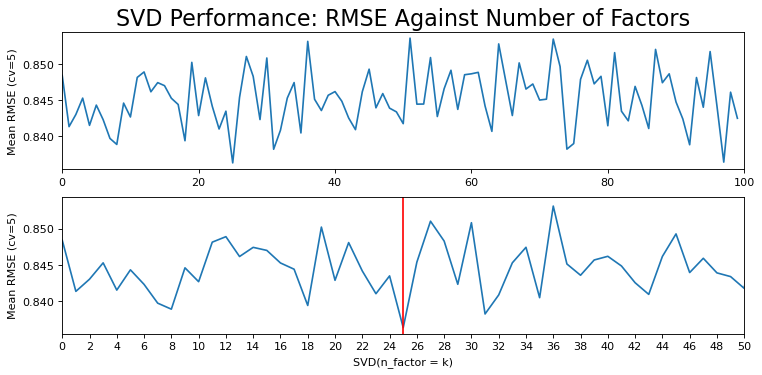

In [136]:
plot_rmse(rmse_svd,"SVD")

In [142]:
param_grid = {'reg_all': [0.002], 'lr_all': [0.0005], 'n_epochs': [20, 40], 'n_factors': [2, 8,13 , 15, 18, 23, 25, 35, 49]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data)


# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.8355686429661928
{'reg_all': 0.002, 'lr_all': 0.0005, 'n_epochs': 20, 'n_factors': 23}


In [35]:
algo = SVD()
algo.n_epochs = 10
algo.n_factors = 15

In [21]:
algo.fit(trainset)


# Predict ratings for all pairs (i,j) that are NOT in the training set.
testset = trainset.build_anti_testset()

predictions = algo.test(testset)
test = algo.test(test_model)
# subset of the list  predictions
dump.dump(r"C:\Users\aebbe\PycharmProjects\drinqs-backend\test_dump.csv")
test[0:2]

[Prediction(uid=5.0, iid=767.0, r_ui=1.0, est=0.34326853507190935, details={'was_impossible': False}),
 Prediction(uid=5.0, iid=1068.0, r_ui=1.0, est=0.43088390493304435, details={'was_impossible': False})]

In [22]:
def get_top_n(predictions, userId, df_input, n = 10):
    '''Return the top N (default) movieId for a user,.i.e. userID and history for comparisom
    Args:
    Returns: 
  
    '''
    #Peart I.: Surprise docomuntation
    
    #1. First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    #2. Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = False)
        top_n[uid] = user_ratings[: n ]
    
    #Part II.: inspired by: https://beckernick.github.io/matrix-factorization-recommender/
    
    #3. Tells how many movies the user has already rated
    user_data = df_input[df_input.user_id == (userId)]
    print('User {0} has already rated {1} movies.'.format(userId, user_data.shape[0]))

    
    #4. Data Frame with predictions. 
    preds_df = pd.DataFrame([(id, pair[0],pair[1]) for id, row in top_n.items() for pair in row],
                        columns=["user_id" ,"ctail_id","rat_pred"])
    
    
            
    #6. Return hist_usr, i.e. top N historically rated movies with (merged) titles and genres for holistic evaluation
    hist_usr = df_input[df_input.user_id == (userId) ].sort_values("rating", ascending = False)
    
    
    return hist_usr, preds_df

In [23]:
def get_top_n(userId, n=10):
    '''Return the top N (default) cocktail_id for a user,.i.e. userID
    Args:
    Returns:

    '''
    # for now read from csv
    predictions, algo = dump.load(r"C:\Users\aebbe\PycharmProjects\drinqs-backend\test_dump.csv")

    # 1. First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # 2. Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[: n]

    # Part II.: inspired by: https://beckernick.github.io/matrix-factorization-recommender/

    # 4. Data Frame with predictions.
    preds_df = pd.DataFrame([(id, pair[0], pair[1]) for id, row in top_n.items() for pair in row],
                            columns=["user_id", "ctail_id", "rat_pred"])
    return preds_df

In [134]:
hist_SVD_2, pred_SVD_2 = get_top_n(predictions, 2, df)

User 2 has already rated 98 movies.


In [137]:
pred_SVD_2.sort_values("rat_pred")

,user_id,ctail_id,rat_pred
710,107.0,768.0,-0.182217
711,107.0,1129.0,-0.170547
580,74.0,1345.0,-0.157169
20,4.0,1228.0,-0.151704
500,82.0,1228.0,-0.148026
...,...,...,...
159,68.0,295.0,0.322227
576,62.0,505.0,0.324674
577,62.0,1115.0,0.327377
578,62.0,465.0,0.331727
